Se dau mai multe imagini (salvate in folder-ul "data/images"). Se cere:

sa se vizualizeze una din imagini

In [28]:
import pandas as pd
from PIL import Image, ImageFilter
import os
import matplotlib.pyplot as plt
import random 

images_list = os.listdir("images")
path_img = os.path.join("images",images_list[random.randint(0,len(images_list)-1)])
img = Image.open(path_img)
img.show()

daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.

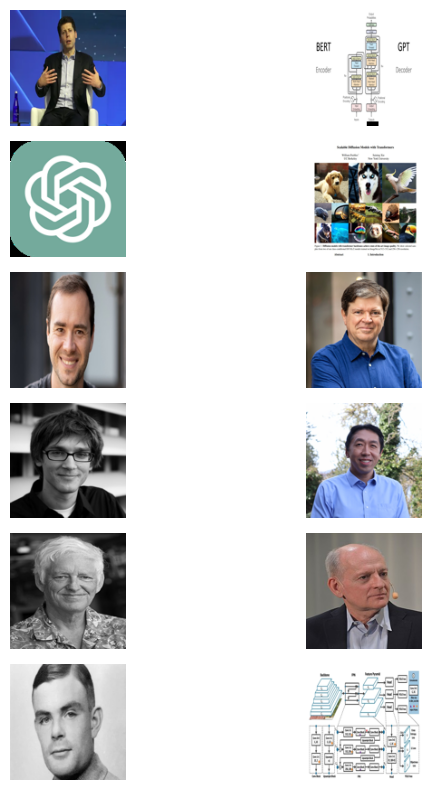

In [11]:
import math

images_list2 = os.listdir("images")

dim = (128, 128)
redimentions = []

for imagine in images_list2:
  cale_img = os.path.join("images", imagine)
  try:
    img = Image.open(cale_img).resize(dim)
    img = Image.open(cale_img).resize(dim).convert('RGB')
    redimentions.append(img)
  except Exception as e:
    print(f"Error loading {imagine}: {e}")


nr_images = len(redimentions)
nr_col = 2
nr_lin = math.ceil(nr_images / nr_col) 

tabel = pd.DataFrame(columns=[f"Imagine{i+1}" for i in range(nr_col)])

fig, ax = plt.subplots(nr_lin, nr_col, figsize=(8, 8))

for i, img in enumerate(redimentions):
  row, col = i // nr_col, i % nr_col
  ax[row, col].imshow(img)
  ax[row, col].axis("off")  

plt.tight_layout()
plt.show()

sa se transforme imaginile in format gray-levels si sa se vizualizeze

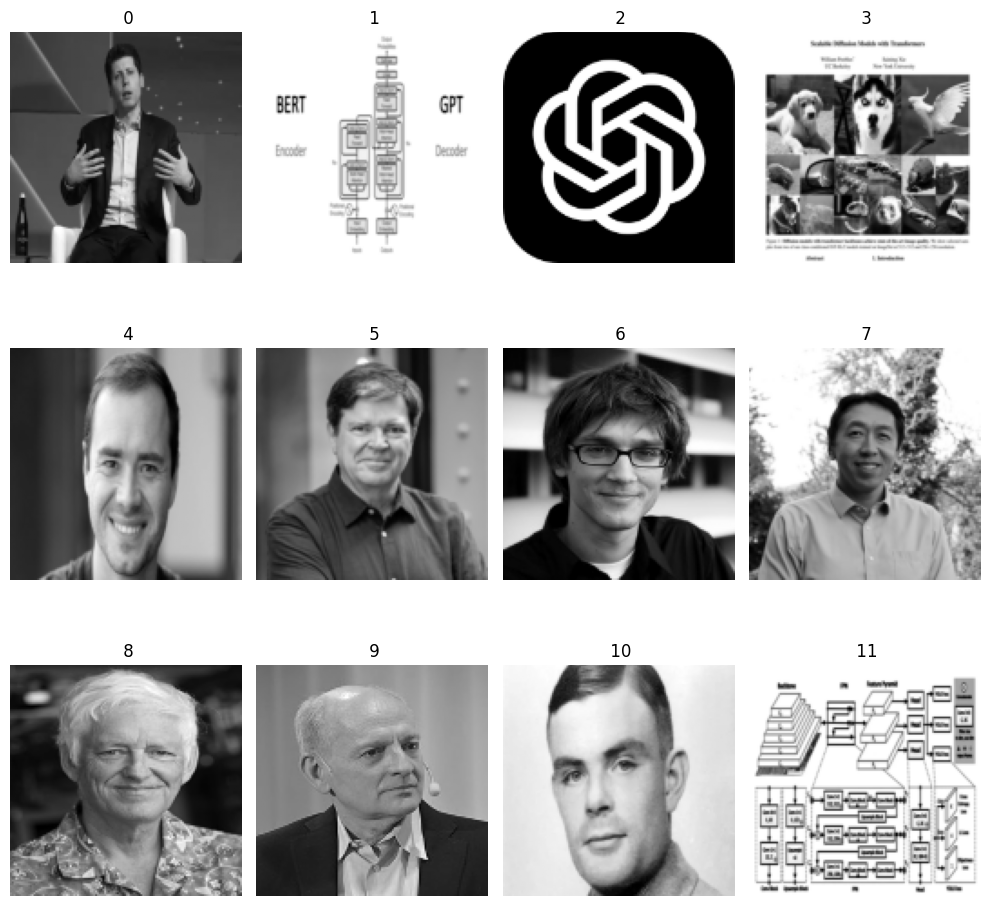

In [10]:
import io 
from skimage import transform, io as skio
import numpy as np 

fig, axes = plt.subplots(3,4, figsize=(10,10))

img_redo = [f for f in images_list]

axes = axes.flatten()
for i, ax in enumerate(axes):
  if i < len(img_redo): 
    path = os.path.join("images", img_redo[i])
    img = skio.imread(path, as_gray=True)
    rescale_img = transform.resize(img, (128, 128))
    ax.imshow(rescale_img, cmap='gray')
    ax.set_title(f" {i}")
    ax.axis('off')
    
plt.tight_layout()
plt.show()

sa se blureze o imagine si sa se afiseze in format "before-after"

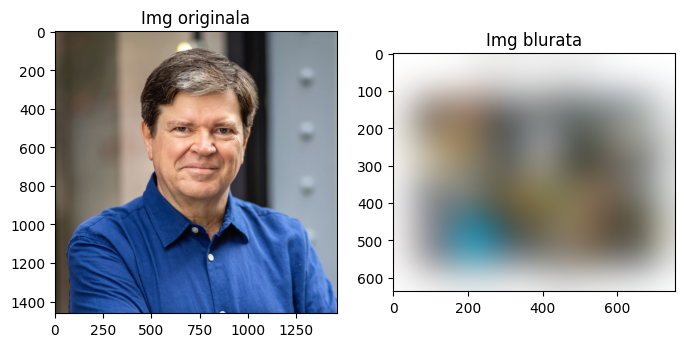

In [29]:
blur_intens = 48 
before_img = Image.open(os.path.join("images",images_list[3]))
blurred_img = before_img.filter(ImageFilter.GaussianBlur(blur_intens))

fix,ax = plt.subplots(1,2,figsize =(8,8))
ax[0].imshow(img)
ax[0].set_title("Img originala")
ax[1].imshow(blurred_img)
ax[1].set_title("Img blurata")
plt.show()